In [1]:
import warnings
from pprint import pprint
from collections import Counter
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import seaborn as sns
import numpy as np

In [2]:
students = pd.read_csv("../data/6-student_merged.csv", sep=";", dtype={'from_hei': "string", 'to_hei': "string", 'level': 'category', 'language:': "category",
                       'year': "category", 'gender': "category", 'nationality': "category", 'previous': "category", 'qualification': "category", 'languageprep': "category"})

#Remove white spaces
students['from_hei'] = students['from_hei'].str.replace(" ", "_")
students['to_hei'] = students['to_hei'].str.replace(" ", "_")

print(students.dtypes)

from_hei           string
to_hei             string
age                 int64
gender           category
nationality      category
subject             int64
subject1            int64
level            category
yearsprior          int64
duration          float64
credit              int64
language           object
languageprep     category
sevsupp           float64
grant             float64
previous         category
qualification    category
year             category
distance          float64
direction         float64
dtype: object


print(students)

In [3]:
G = nx.DiGraph()
print("# of nodes: ", G.number_of_nodes())
print("# of edges: ", G.number_of_edges())

# of nodes:  0
# of edges:  0


In [4]:
#Get nodes (hei codes)
nodes_out = set(students.from_hei.unique())
nodes_in = set(students.to_hei.unique())
nodes = nodes_out.union(nodes_in)
print(len(list(nodes)))

#G.add_nodes_from(nodes_for_adding = list(nodes))

3292


In [5]:
#Get edges
'''
Weighted
Directed
'''
#print(nodes)
grouped_st = students.groupby(['from_hei', 'to_hei'])#.size()
#print(grouped_st)
for key, el in grouped_st:
    #print(len(el)
    #Node for key[0], key[1], len(el)
    G.add_edge(key[0], key[1], weight=len(el))


In [6]:
#Print g info
print("# of nodes: ", G.number_of_nodes())
print("# of edges: ", G.number_of_edges())

# of nodes:  3292
# of edges:  151418


# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42)
    )

plt.show()

In [7]:
#Write graph as an edge list
nx.write_weighted_edgelist(G, '../graphs/edge_list.csv')

# Apply RolX

In [8]:
#Extract features
feature_extractor = RecursiveFeatureExtractor(G, max_generations=10)
features = feature_extractor.extract_features()

print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 6 recursive generations:
              external_edges(mean)(mean)(mean)(mean)(mean)  \
A__BADEN01                                   145872.735983   
A__DORNBIR01                                 140796.345033   
A__EISENST01                                 146186.842411   
A__EISENST02                                 143570.042382   
A__EISENST05                                 114744.920677   
...                                                    ...   
Unknown_PT                                        0.000000   
Unknown_S                                    143673.982646   
Unknown_SK                                        0.000000   
Unknown_TR                                   149752.078361   
Unknown_UK                                        0.000000   

              external_edges(mean)(mean)(mean)(mean)  \
A__BADEN01                             147234.072295   
A__DORNBIR01                           139357.315492   
A__EISENST01                         

In [9]:
#Extract roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

/description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
/home/david/.pyenv/versions/rolx/lib/python3.7/site-packages/graphrole/roles/description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
/home/david/.pyenv/versions/rolx/lib/python3.7/site-packages/graphrole/roles/description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
/home/david/.pyenv/versions/rolx/lib/python3.7/site-packages/graphrole/roles/description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
/home/david/.pyenv/versions/rolx/lib/python3.7/site-packages/graphrole/roles/description_length.py:56: RuntimeWarning: d

In [14]:
#Print role info

'''
print('\nNode role assignments:')
pprint(node_roles)
'''

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))

role_count = Counter(node_roles.values())
pprint(role_count)


Node role membership by percentage:
              role_0  role_1  role_2  role_3  role_4  role_5  role_6  role_7
A__BADEN01      0.01    0.39    0.01    0.01    0.20    0.01    0.20    0.20
A__DORNBIR01    0.01    0.20    0.01    0.01    0.01    0.01    0.39    0.39
A__EISENST01    0.01    0.39    0.01    0.20    0.20    0.01    0.01    0.20
A__EISENST02    0.00    0.31    0.00    0.00    0.00    0.15    0.52    0.00
A__EISENST05    0.01    0.32    0.01    0.01    0.63    0.01    0.01    0.01
...              ...     ...     ...     ...     ...     ...     ...     ...
Unknown_PT      0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.12
Unknown_S       0.00    0.00    0.00    0.00    0.00    0.00    0.61    0.36
Unknown_SK      0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.12
Unknown_TR      0.00    0.45    0.13    0.00    0.13    0.00    0.27    0.00
Unknown_UK      0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.12

[3292 rows x 8 columns]
Counter({'role

# Analyze Graph Stats

#Connected components

print("Number of connected components: ", nx.number_connected_components(G))

G_components = [G.subgraph(c).copy() for c in nx.connected_components(G)]

for num, c in enumerate(G_components):
    print(f"Component {num}, {c.number_of_nodes()} nodes")
    

#Analyze components 1, 2 and 3

components_nodes = []
for num in [1,2,3]:
    c = G_components[num]
    print(f"Component {num}: {c.nodes}")
    for node in c.nodes:
        components_nodes.append(node)

print(components_nodes)

for node in components_nodes:
    print(f"University {node}, role: {node_roles[node]}")

Component 1: ESCOLA LES HEURES (Spain) and SOUTH WEST COLLEGE (UK)

Component 2: EUROPEAN SCHOOL OF OSTEOPATHY (UK) and CIDO, CENTRE INTERNATIONAL D'OSTÉOPATHIE (France)

Component 3: Sveuciliste Sjever (Croatia), VISOKA ŠOLA ZA ZDRAVSTVO NOVO MESTO (Slovenia), and VELEUČILIŠTE U VARAŽDINU (Croatia)

# Observe features for roles

In [15]:
roles_values = list(node_roles.values())
roles_keys = list(node_roles.keys())

#add roles_values to features dataset
features['roles'] = roles_values

#Group by roles and take mean of the features
#grouped_st = students.groupby(['from_hei', 'to_hei'])#.size()

grouped_feat = features.groupby('roles').mean()

pprint(grouped_feat)



        external_edges(mean)(mean)(mean)(mean)(mean)  \
roles                                                  
role_0                                  14379.842581   
role_1                                 141485.872804   
role_2                                 147282.851756   
role_3                                 138997.465204   
role_4                                 126502.187412   
role_5                                 145885.545762   
role_6                                 140356.299378   
role_7                                 139858.375776   

        external_edges(mean)(mean)(mean)(mean)  \
roles                                            
role_0                            14261.455356   
role_1                           141852.190005   
role_2                           150182.522883   
role_3                           139336.035240   
role_4                           121464.547492   
role_5                           148312.682939   
role_6                           140292

## Pagerank

In [16]:
pr = nx.pagerank(G, alpha=0.9)
pprint(pr)


 0.0007393770447647666,
 'SF_TURKU01': 0.0011099033360454653,
 'SF_TURKU02': 0.0005516731299183031,
 'SF_TURKU03': 0.00013386883397584497,
 'SF_TURKU05': 0.0011922031725837767,
 'SF_VAASA01': 0.0004832596369081196,
 'SF_VAASA03': 0.00031943066223886796,
 'SF_VAASA13': 0.00022714051711383596,
 'SF_VANTAA06': 0.0008099762700306951,
 'SI_CELJE03': 4.7694969456999976e-05,
 'SI_CELJE04': 3.797327198092871e-05,
 'SI_CELJE06': 3.658825520215732e-05,
 'SI_CELJE08': 3.581427260241048e-05,
 'SI_JESENIC01': 5.435974663608455e-05,
 'SI_KOPER03': 0.0004634898141854579,
 'SI_KOPER04': 3.635062992051309e-05,
 'SI_KRANJ03': 3.597710952653409e-05,
 'SI_KRANJ04': 3.5727853255529944e-05,
 'SI_LJUBLJA01': 0.0034384501276583045,
 'SI_LJUBLJA07': 6.542445276968343e-05,
 'SI_LJUBLJA08': 4.2177573411396605e-05,
 'SI_LJUBLJA09': 0.00010347747755457311,
 'SI_LJUBLJA10': 3.7307529646387614e-05,
 'SI_LJUBLJA17': 3.604201572635629e-05,
 'SI_MARIBOR01': 0.0012445353106995338,
 'SI_MARIBOR02': 3.640073571350431e-05,

In [17]:
nodes = pd.DataFrame(list(node_roles.items()), columns=['name', 'role'])
nodes["pagerank"] = pr.values()
print(nodes)
grouped_feat["pagerank"] = nodes.groupby('role').mean()

              name    role  pagerank
0       A__BADEN01  role_1  0.000068
1     A__DORNBIR01  role_6  0.000747
2     A__EISENST01  role_1  0.000861
3     A__EISENST02  role_6  0.001013
4     A__EISENST05  role_4  0.002159
...            ...     ...       ...
3287    Unknown_PT  role_0  0.000037
3288     Unknown_S  role_6  0.000039
3289    Unknown_SK  role_0  0.000036
3290    Unknown_TR  role_1  0.000036
3291    Unknown_UK  role_0  0.000036

[3292 rows x 3 columns]


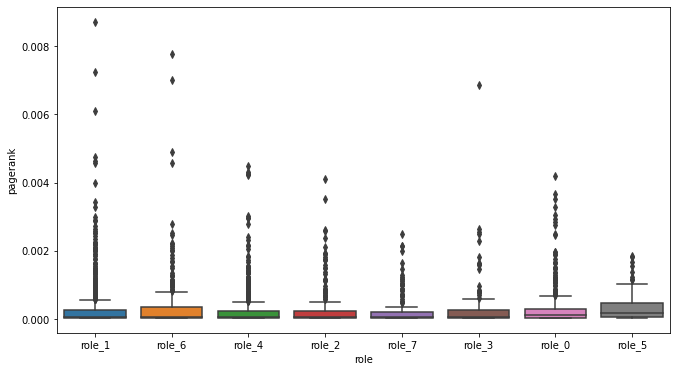

In [18]:
f, ax = plt.subplots(figsize=(11, 6))
ax.set(xlabel="pagerank")
# Draw a violinplot with a narrower bandwidth than the default
sns.boxplot(data=nodes, x="role", y="pagerank")
f.savefig("../plots/pagerank.png")

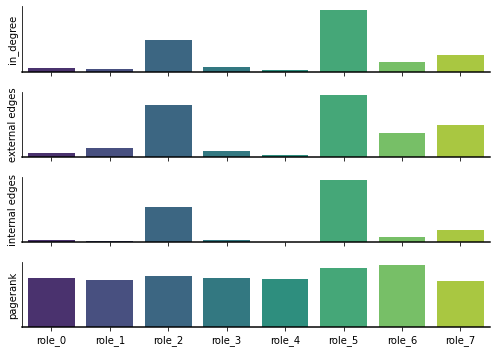

In [20]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(7, 5), sharex=True)

x = np.array(list(grouped_feat.index))
sns.barplot(x=x, y=grouped_feat["in_degree"], palette="viridis", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("in_degree")

sns.barplot(x=x, y=grouped_feat["external_edges"], palette="viridis", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("external edges")

sns.barplot(x=x, y=grouped_feat["internal_edges"], palette="viridis", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("internal edges")

sns.barplot(x=x, y=grouped_feat["pagerank"], palette="viridis", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("pagerank")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
f.savefig("../plots/role_features.png")